# Asymptotic study


References from :
- MIT 6.006 Introduction to Algorithms - R1. Asymptotic Complexity, Peak Finding (https://www.youtube.com/watch?v=P7frcB_-g4w&list=PLUl4u3cNGP61Oq3tWYp6V_F-5jb5L2iHb&index=25)

## Imports

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("husl")
sns.set_style("darkgrid")

## Helper plot function

In [42]:
def plot_functions(title, funcs_dic, start=10, end=1000) :
    points = np.arange(start,end)
    plt.figure(figsize=(15,8))
    for legend, fun in funcs_dic.items():
        plt.plot(fun(points), label=legend)
    plt.legend(loc='upper left', prop={'size': 20})
    plt.title(f"\n{title}\n", fontsize=25)
    plt.xlabel("Input size", fontsize=20)
    plt.ylabel("Complexity", fontsize=20)
    plt.yscale('linear')
    plt.show()

## Θ Notation

The Θ notation defines both upper and lower bounds of a function runtime.

If we have a function g(x), and it is defined that g(x) = Θ(f(x)), we are implying that the runtime from g(x) will be bounded by f(x) __only differing by a constant factor__.

It is important to gurantee that the bounds are within the difference of a constant factor. The below exaple illustrates that scenario.

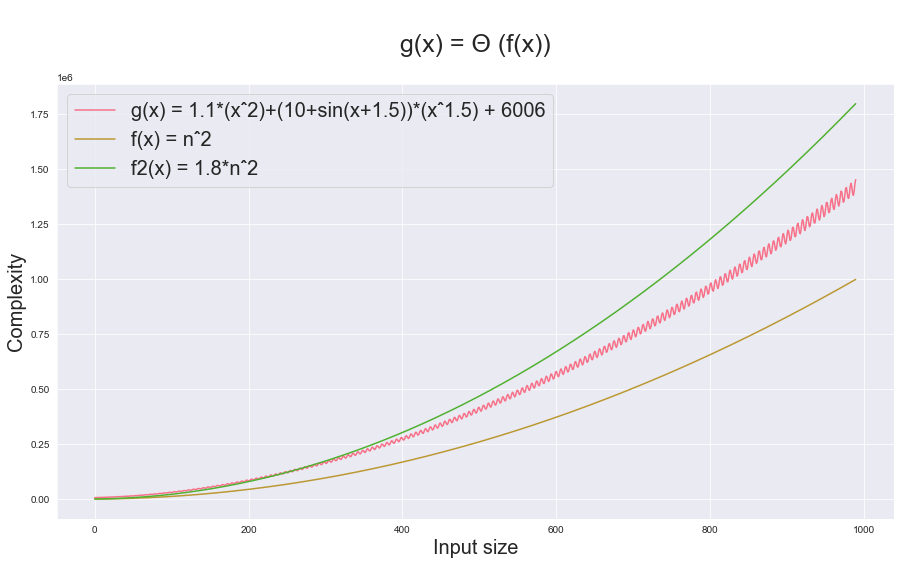

In [12]:
g = lambda x : 1.1*(x**2)+(10+np.sin(x+1.5))*(x**1.5) + 6006
f = lambda x : x**2
f2 = lambda x : 1.8*x**2

a = np.arange(10,1000)


d = {'g(x) = 1.1*(xˆ2)+(10+sin(x+1.5))*(xˆ1.5) + 6006': g, 'f(x) = nˆ2': f, 'f2(x) = 1.8*nˆ2': f2}
plot_functions('g(x) = Θ (f(x))', d)

## O Notation

Sometimes it is not easy to figure out the lower bound of a function.

In cases like that, the O notation defines an upper bound for a function.

The O notation assures that the runtime of the function g(x) will never surpess f(x).

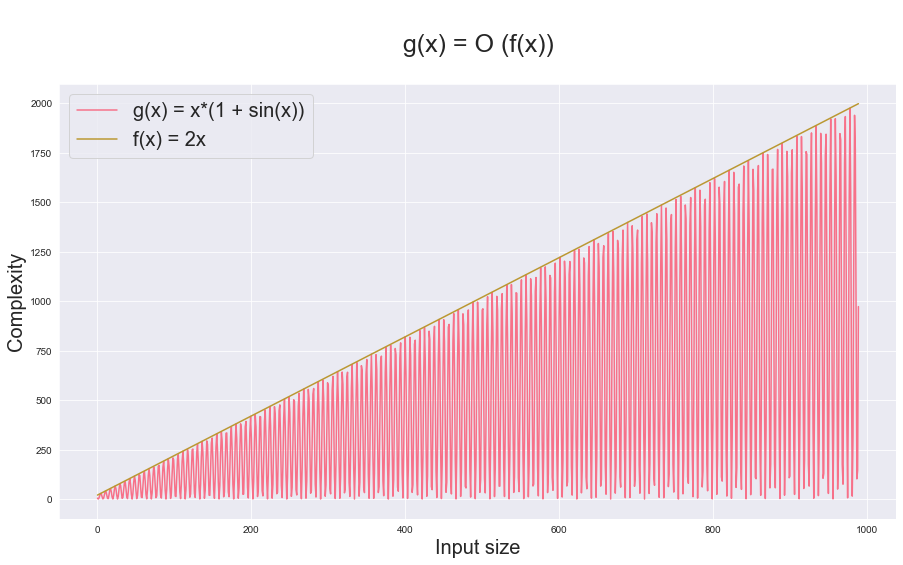

In [13]:
g = lambda x : x*(1 + np.sin(x))
f = lambda x : 2*x

d = {'g(x) = x*(1 + sin(x))': g, 'f(x) = 2x': f}
plot_functions('g(x) = O (f(x))', d)

## Ω Notation

Sometimes it is not easy to figure out the upper bound of a function.

In cases like that, the Ω notation defines an lower bound for a function.

The Ω notation assures that the runtime of the function g(x) will never be less than f(x).

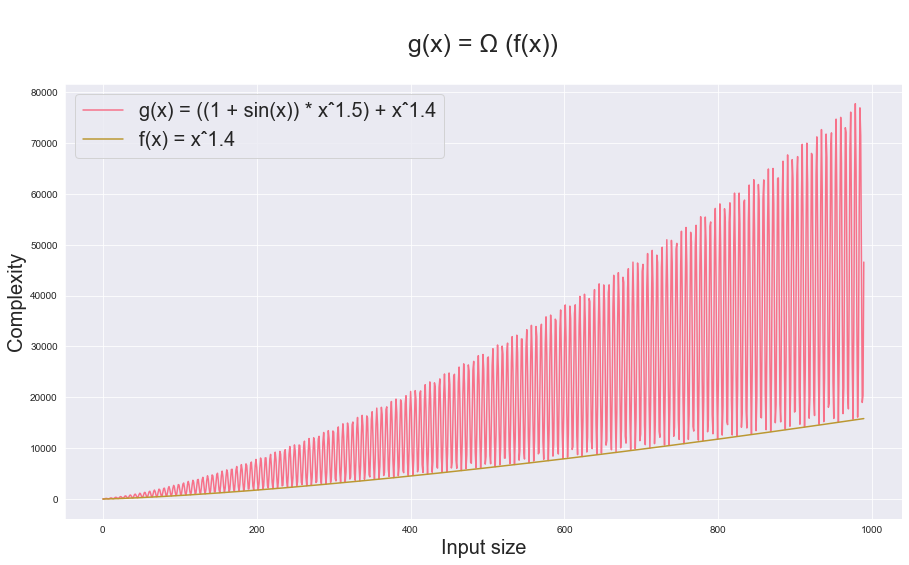

In [14]:
g = lambda x : ((1 + np.sin(x)) * x**1.5) + x**1.4
f = lambda x : x**1.4

d = {'g(x) = ((1 + sin(x)) * xˆ1.5) + xˆ1.4': g, 'f(x) = xˆ1.4': f}

plot_functions('g(x) = Ω (f(x))', d)

## Case study analysis

### Let's take the example : **_g(x) = ((1 + sin(x)) * xˆ1.5) + xˆ1.4'_**

Unlike the first case, g(x) = 1.1*(x**2)+(10+np.sin(x+1.5))*(x**1.5) + 6006, we can not chose a functions that will bound g(x) differing only by a constant factor.

In the above example, we have different upper and lower bounds :
- Upper bound = 3xˆ1.5
- lower bound = xˆ1.4

It is to be observed that g(x) bounds differ by their exponent, which is more than a constant factor.

In this case, we can not specify a Θ asymptotic analysis of g(x). However, we are able to provide both **O** and **Ω** analysis for g(x) runtime. This will give us the information of the kind of runtime to expect from g(x) on its best and worst cases :

- g(x) = O(3xˆ1.5)
- g(x) = Ω(xˆ1.4)

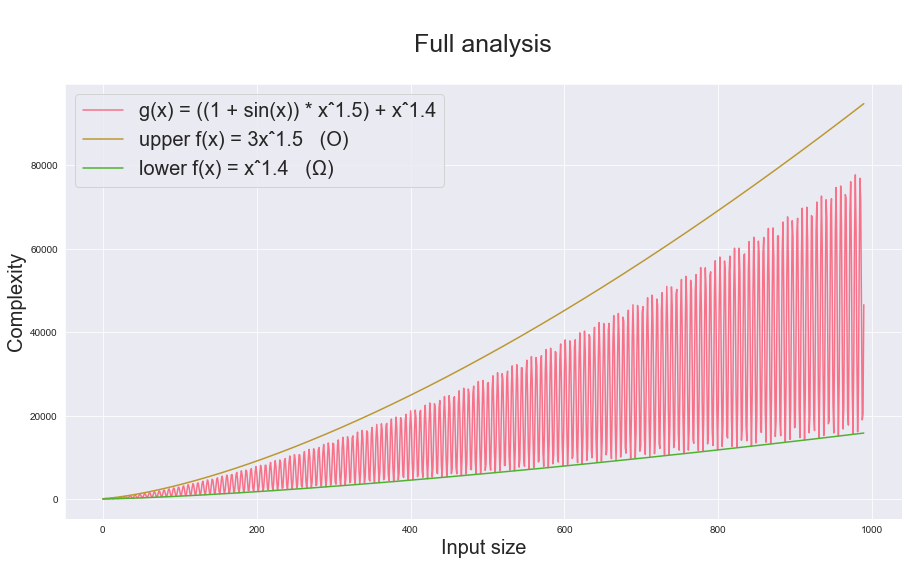

In [29]:
g = lambda x : ((1 + np.sin(x)) * x**1.5) + x**1.4
f_upper = lambda x : 3*x**1.5
f_lower = lambda x : x**1.4

d = {
    'g(x) = ((1 + sin(x)) * xˆ1.5) + xˆ1.4': g,
    'upper f(x) = 3xˆ1.5   (O)': f_upper, 
    'lower f(x) = xˆ1.4   (Ω)': f_lower
    }

plot_functions('Full analysis', d)

## Most common runtimes

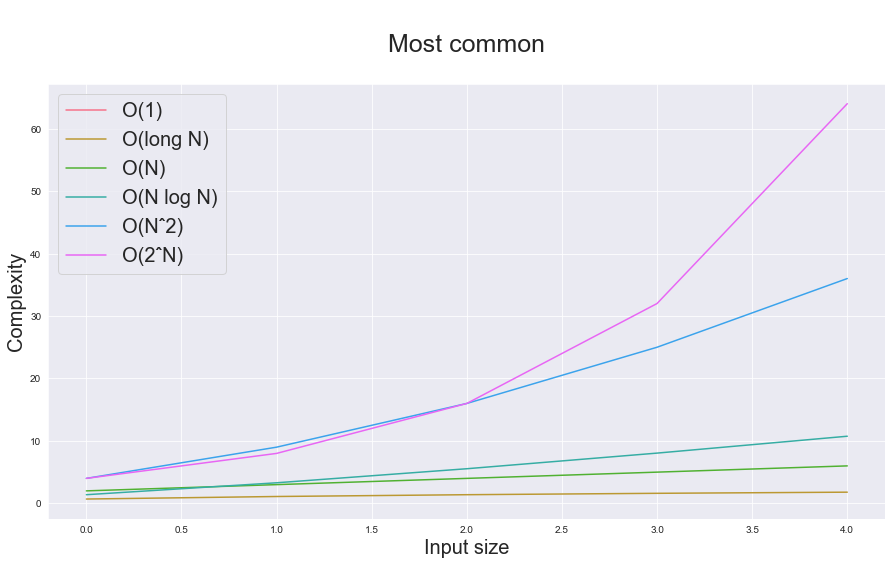

In [61]:
f_1 = lambda x : 1
f_logn = lambda x : np.log(x)
f_n = lambda x : x
f_nlogn = lambda x : x*np.log(x)
f_n2 = lambda x : x**2
f_2n = lambda x : 2**x

d = {
    'O(1)' : f_1,
    'O(long N)': f_logn,
    'O(N)': f_n,
    'O(N log N)': f_nlogn,
    'O(Nˆ2)': f_n2,
    'O(2ˆN)': f_2n
    }

plot_functions('Most common', d, 2, 7)